In [ ]:
# Install required packages.
import os
import torch
os.environ['TORCH'] = torch.__version__
print(torch.__version__)

!pip install -q torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install -q git+https://github.com/pyg-team/pytorch_geometric.git

2.0.1+cu118
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.6/107.6 kB 4.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.2/209.2 kB 6.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done


In [ ]:
import os
import torch

In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np
import os
import shutil
import torch
import random
from google.colab import drive
from random import shuffle
from torch.nn import Linear
from torch_geometric.nn import GCNConv
import torch.nn.functional as F
from torch_geometric.nn import global_mean_pool
from torch_geometric.data import Data # , Dataset
from torch_geometric.loader import DataLoader
from torch_geometric.data import InMemoryDataset
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.utils.multiclass import unique_labels

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
#import codecs
#import sys
#from operator import itemgetter
from numpy import linalg as LA
#from functions_base import store_undirected_network, read_network

In [ ]:
def store_undirected_network(A, N, path):
  f_out = open(path,'wb')
  for i in range(N-1):
    for j in range(i+1,N,1):
      if A[i,j] == 1:
        #print i+1,j+1
        f_out.write(str(i+1)+' '+str(j+1)+'\n')
  f_out.close()

def read_network(filename):

   fh = open(filename,"rb")

   G = nx.Graph()
   for line in fh:
     x,y = line.split()
     x1 = int(x)
     y1 = int(y)
     G.add_edge(x1, y1)

   #N = len(nx.nodes(G))

   return G


In [ ]:
def get_ipr(A):
  e_val, e_vec = LA.eigh(A)
  d = np.shape(e_vec)
  n = d[0]
  lam1 = e_val[n-1]
  Ev1 = e_vec[:,n-1]


  IPR1 = 0.0;
  for i in range(n):
    IPR1 = IPR1 + pow(Ev1[i],4);
  del e_val
  del e_vec
  del Ev1

  return IPR1,lam1


path = 'wheel_random_comb_loc.txt'

s1 = 398
r = 11
Flag = False
while not Flag:
  G1 = nx.random_regular_graph(r,s1)
  #G1 = nx.fast_gnp_random_graph(s1, p)
  Flag = nx.is_connected(G1)
  print Flag

M1 = np.zeros((s1,s1),dtype=int)
Edge_list1 = nx.edges(G1)
for edge in Edge_list1:
  x = edge[0]
  y = edge[1]
  M1[x-1][y-1] = 1
  M1[y-1][x-1] = 1

ipr11,lam11 = get_ipr(M1)

s2 = 100

G2 = nx.wheel_graph(s2)

N = s1 + s2 + 1

M = np.zeros((N,N), dtype=int)
M2 = np.zeros((s2,s2), dtype=int)

Edge_list2 = nx.edges(G2)
for edge in Edge_list2:
     x = edge[0]
     y = edge[1]
     M2[x][y] = 1
     M2[y][x] = 1

   #print 'Number of nodes in wheel graph: %d' %s2
   #print 'Number of edges in wheel graph: ', nx.number_of_edges(G)

ipr21,lam21 = get_ipr(M2)
   #print 's2: %d lam11: %0.4f lam12: %0.4f lam21: %0.4f lam22: %0.4f\n'%(s2,lam11,lam12,lam21,lam22)
   #print 's2: %d ipr1: %0.4f ipr2: %0.4f ipr3: %0.4f lam1: %0.4f lam2: %0.4f lam3: %0.4f\n'% (s2,ipr1,ipr2,ipr3,lam1,lam2,lam3)

for i in range(s1):
     for j in range(s1):
       M[i][j] = M1[i][j]


M[s1-1][s1] = 1
M[s1][s1-1] = 1
M[s1][s1+1] = 1
M[s1+1][s1] = 1

i = s1 + 1
j = s1 + 1
m = 0
n = 0

while i<N and m<s2:
      j = s1+1
      n = 0
      while j<N and n<s2:
         M[i][j] = M2[m][n]
         #print i,j,m,n
         j = j + 1
         n = n + 1
      i = i + 1
      m = m + 1

gp = nx.from_numpy_matrix(M)
ipr1,lam1 = get_ipr(M)
print(nx.is_connected(gp))

print 'N: %d s2: %d ipr1: %0.4f lam1: %0.4f lam11: %0.4f lam21: %0.4f\n'%  (N,s2,ipr1,lam1,lam11,lam21)
#fd.write(str(N)+' '+str(s2)+' '+str(ipr1)+' '+str(lam1)+' '+str(lam11)+' '+str(lam21)+'\n')
store_undirected_network(M, N, path)

del G2
del gp
del M
del M2

#fd.close()

In [ ]:
# Number of features for each node
num_features = 3

# Number of classes either 0/1
num_classes = 2

# Data Generation

In [ ]:
def barabasi(numgraphs, num_features, start, end):
  datasetg1 = []
  for i in range(0,numgraphs):
      n = np.random.randint(start, end)
      m = np.random.randint(2, 4)
      G1 = nx.barabasi_albert_graph(n,m)
      Ag1 = nx.adjacency_matrix(G1)
      Ag1 = torch.tensor(Ag1.todense())   # Creating Adjacency matrix from graph

      row, col = torch.nonzero(Ag1, as_tuple=True)
      edge_indexg1 = torch.stack([row, col], dim=0) # Creating Edge_index from graph

      # Creating Feature matrix using number of features
      xg1 = torch.randint(low=0, high=2, size=(len(Ag1), num_features), dtype=torch.float)
      yg1 = torch.tensor(1)  # Creating Labels

      datag1 = Data(x = xg1, edge_index = edge_indexg1.contiguous(), edge_attr = None, y = yg1, pos =  None)
      datasetg1.append(datag1)
  return G1,datasetg1

In [ ]:
def erdos(numgraphs, num_features, start, end):
  datasetg2 = []
  for i in range(0,numgraphs):
      n = np.random.randint(start, end)
      p = np.random.uniform(0.1, 0.3)
      G2 = nx.erdos_renyi_graph(n, p)

      sel = any(G2.has_edge(j, j) for j in G2.nodes())
      while sel == True:
            n = np.random.randint(start, end)
            p = np.random.uniform(0.1, 0.3)
            G2 = nx.erdos_renyi_graph(n, p)
            sel = any(G2.has_edge(j, j) for j in G2.nodes())

      con = nx.is_connected(G2)
      while con == False: # Checking if the graph is connected or not ?
            n = np.random.randint(start, end)
            p = np.random.uniform(0.1, 0.3)
            G2 = nx.erdos_renyi_graph(n, p)
            con = nx.is_connected(G2)

      Ag2 = nx.adjacency_matrix(G2)
      Ag2 = torch.tensor(Ag2.todense())   # Creating Adjacency matrix from graph

      row, col = torch.nonzero(Ag2, as_tuple=True)
      edge_indexg2 = torch.stack([row, col], dim=0) # Creating Edge_index from graph

      # Creating Feature matrix using number of features
      xg2 = torch.randint(low=0, high=2, size=(len(Ag2), num_features), dtype=torch.float)
      yg2 = torch.tensor(0)   # Creating Labels

      datag2 = Data(x = xg2, edge_index = edge_indexg2.contiguous(), edge_attr = None, y = yg2, pos =  None)
      datasetg2.append(datag2)
  return G2,datasetg2

In [ ]:
def star(ngraphs, num_features, start, end):
  dataset1 = []
  for i in range(0,ngraphs):
      n = np.random.randint(start, end)
      a1 = nx.star_graph(n)
      A1 = nx.adjacency_matrix(a1)
      A1 = torch.tensor(A1.todense()) # Creating Adjacency matrix from graph

      row, col = torch.nonzero(A1, as_tuple=True)
      edge_index1 = torch.stack([row, col], dim=0) # Creating Edge_index from graph

      x1 = torch.randint(low=0, high=2, size=(len(A1), num_features), dtype=torch.float)   # Creating Feature matrix using number of features
      y1 = torch.tensor(1)   # Creating Labels

      data1 = Data(x = x1, edge_index = edge_index1.contiguous(), edge_attr = None, y = y1, pos =  None)
      dataset1.append(data1)
  return a1, dataset1

In [ ]:
def wheel(ngraphs, num_features, start, end):
  dataset2 = []
  for i in range(0,ngraphs):
      n = np.random.randint(start, end)
      a2 = nx.wheel_graph(n)
      A2 = nx.adjacency_matrix(a2)
      A2 = torch.tensor(A2.todense()) # Creating Adjacency matrix from graph

      row, col = torch.nonzero(A2, as_tuple=True)
      edge_index2 = torch.stack([row, col], dim=0) # Creating Edge_index from graph

      x2 = torch.randint(low=0, high=2, size=(len(A2), num_features), dtype=torch.float)   # Creating Feature matrix using number of features
      y2 = torch.tensor(1)   # Creating Labels

      data2 = Data(x = x2, edge_index = edge_index2.contiguous(), edge_attr = None, y = y2, pos =  None)
      dataset2.append(data2)
  return a2, dataset2

In [ ]:
def cycle(ngraphs, num_features, start, end):
  dataset3 = []
  for i in range(0,ngraphs):
      n = np.random.randint(start, end)
      a3 = nx.cycle_graph(n)
      A3 = nx.adjacency_matrix(a3)
      A3 = torch.tensor(A3.todense())# Creating Adjacency matrix from graph

      row, col = torch.nonzero(A3, as_tuple=True)
      edge_index3 = torch.stack([row, col], dim=0) # Creating Edge_index from graph

      x3 = torch.randint(low=0, high=2, size=(len(A3), num_features), dtype=torch.float)   # Creating Feature matrix using number of features
      y3 = torch.tensor(0)   # Creating Labels

      data3 = Data(x = x3, edge_index = edge_index3.contiguous(), edge_attr = None, y = y3, pos =  None)
      dataset3.append(data3)
  return a3, dataset3

In [ ]:
def complete(ngraphs, num_features, start, end):
  dataset4 = []
  for i in range(0,ngraphs):
      n = np.random.randint(start, end)
      a4 = nx.complete_graph(n)
      A4 = nx.adjacency_matrix(a4)
      A4 = torch.tensor(A4.todense())# Creating Adjacency matrix from graph

      row, col = torch.nonzero(A4, as_tuple=True)
      edge_index4 = torch.stack([row, col], dim=0) # Creating Edge_index from graph

      x4 = torch.randint(low=0, high=2, size=(len(A4), num_features), dtype=torch.float)   # Creating Feature matrix using number of features
      y4 = torch.tensor(0)   # Creating Labels

      data4 = Data(x = x4, edge_index = edge_index4.contiguous(), edge_attr = None, y = y4, pos =  None)
      dataset4.append(data4)
  return a4, dataset4

In [ ]:
def path(ngraphs, num_features, start, end):
  dataset5 = []
  for i in range(0,ngraphs):
      n = np.random.randint(start, end)
      a5 = nx.path_graph(n)
      A5 = nx.adjacency_matrix(a5)
      A5 = torch.tensor(A5.todense())# Creating Adjacency matrix from graph

      row, col = torch.nonzero(A5, as_tuple=True)
      edge_index5 = torch.stack([row, col], dim=0) # Creating Edge_index from graph

      x5 = torch.randint(low=0, high=2, size=(len(A5), num_features), dtype=torch.float)   # Creating Feature matrix using number of features
      y5 = torch.tensor(1)   # Creating Labels

      data5 = Data(x = x5, edge_index = edge_index5.contiguous(), edge_attr = None, y = y5, pos =  None)
      dataset5.append(data5)
  return a5, dataset5

# Data Preprocessing for training

In [ ]:
# Number of nodes for Training
train_Nstart = 30 # starting node size
train_Nend =  100 # ending node size

train_Nb = 2000 # Number of barabasi albert graphs you want to generate

train_Ne = 2000 # Number of erdosrenyi graphs you want to generate

train_Ns = 200 # Number of star graphs you want to generate

train_Nw = 200 # Number of wheel graphs you want to generate

train_Ncy = 200 # Number of cycle graphs you want to generate

train_Nco = 200 # Number of complete graphs you want to generate

train_Np = 200 # Number of path graphs you want to generate

In [ ]:
#@title training set

train_g1, train_datasetg1 = barabasi(train_Nb, num_features, train_Nstart, train_Nend)
train_g2, train_datasetg2 = erdos(train_Ne, num_features, train_Nstart, train_Nend)
train_g2, train_dataset1 = star(train_Ns, num_features, train_Nstart, train_Nend)
train_g2, train_dataset2 = wheel(train_Nw, num_features, train_Nstart, train_Nend)
train_g2, train_dataset3 = cycle(train_Ncy, num_features, train_Nstart, train_Nend)
train_g2, train_dataset4 = complete(train_Nco, num_features, train_Nstart, train_Nend)
train_g2, train_dataset5 = path(train_Np, num_features, train_Nstart, train_Nend)

Train_dataset  = train_datasetg1 + train_datasetg2 + train_dataset1 + train_dataset2 + train_dataset3 + train_dataset4 + train_dataset5

In [ ]:
# Number of nodes for Testing
#test_Nstart = 20000
#test_Nend = 20001

test_Nstart = 100
test_Nend = 200

test_Nb = 200 #10 #c # Number of barabasi albert graphs you want to generate

test_Ne = 200 #c # Number of erdosrenyi graphs you want to generate

test_Ns = 200 #d # Number of star graphs you want to generate

test_Nw = 200 #d # Number of wheel graphs you want to generate

test_Ncy = 200 #d # Number of cycle graphs you want to generate

test_Nco = 200 #d # Number of complete graphs you want to generate

test_Np = 200 #d # Number of path graphs you want to generate

In [ ]:
#@title testing set

test_g1, test_datasetg1 = barabasi(test_Nb, num_features, test_Nstart, test_Nend)
test_g2, test_datasetg2 = erdos(test_Ne, num_features, test_Nstart, test_Nend)
test_g2, test_dataset1 = star(test_Ns, num_features, test_Nstart, test_Nend)
test_g2, test_dataset2 = wheel(test_Nw, num_features, test_Nstart, test_Nend)
test_g2, test_dataset3 = cycle(test_Ncy, num_features, test_Nstart, test_Nend)
test_g2, test_dataset4 = complete(test_Nco, num_features, test_Nstart, test_Nend)
test_g2, test_dataset5 = path(test_Np, num_features, test_Nstart, test_Nend)

Test_dataset  = test_datasetg1 + test_datasetg2 + test_dataset1 + test_dataset2 + test_dataset3 + test_dataset4 #+ test_dataset5

In [ ]:
print(len(Train_dataset))
print(len(Test_dataset))

5000
1200


# Analyse Dataset

In [ ]:
print("Loc-Deloc Dataset")
print('====================')
print(f'Number of graphs: {len(Train_dataset)}')
print(f'Number of features: {num_features}')
print(f'Number of classes: {num_classes}')

data = Train_dataset[0]  # Get the first graph object.

print()
print(type(Train_dataset))
print(type(data.x))
print(type(data.edge_index))
print(type(data.y))
print(type(data.num_nodes))
print(type(data.num_edges))
print('=============================================================')

# Gather some statistics about the first graph.
print(data)
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')

Loc-Deloc Dataset
Number of graphs: 5000
Number of features: 3
Number of classes: 2

<class 'list'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'torch.Tensor'>
<class 'int'>
<class 'int'>
Data(x=[40, 3], edge_index=[2, 152], y=1)
Number of nodes: 40
Number of edges: 152


In [ ]:
#NOT REQUIRED
#@title Adjacency Matrix
adj = []

for i in range(len(Train_dataset)):
    graph_data = Train_dataset[i]
    node_features = graph_data.x.numpy()
    edge_indices = graph_data.edge_index.numpy()
    num_nodes = node_features.shape[0]
    adj_matrix = np.zeros((num_nodes, num_nodes))
    for i in range(edge_indices.shape[1]):
        src = edge_indices[0, i]
        tgt = edge_indices[1, i]
        adj_matrix[src, tgt] = 1
        adj_matrix[tgt, src] = 1
    adj.append(adj_matrix)

In [ ]:
#@title Min & Max

Max = []
Min = []

for i in range(len(Train_dataset)):
    node_degrees = np.sum(adj[i], axis=1)
    a = np.max(node_degrees)
    b = np.min(node_degrees)
    Max.append(int(a))
    Min.append(int(b))

In [ ]:
#@title AverageNodeDegree/NumNodes/NumEdges/Labels
graphs = []
avgnodedegree = []
NumNodes = []
NumEdges = []
labels = []

for i in range(len(Train_dataset)):
  graphs.append(i+1)
  avgnodedegree.append(Train_dataset[i].num_edges/Train_dataset[i].num_nodes)
  NumNodes.append(Train_dataset[i].num_nodes)
  NumEdges.append(Train_dataset[i].num_edges)
  labels.append(np.array(Train_dataset[i].y))

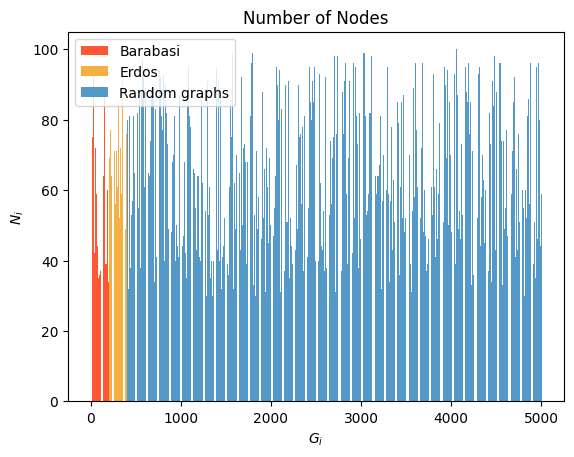

In [ ]:
#@title Number of Nodes Plot
plt.bar(graphs[:200], NumNodes[:200], color='#FF5733', label='Barabasi')
plt.bar(graphs[200:400], NumNodes[200:400], color='#F5B041', label='Erdos')
plt.bar(graphs[400:], NumNodes[400:], color='#5499C7', label='Random graphs')
plt.xlabel(r'$G_{i}$')
plt.ylabel(r'$N_{i}$')
plt.title('Number of Nodes')
plt.legend()
plt.savefig('Mydataset_Number of Nodes.png')
plt.show()

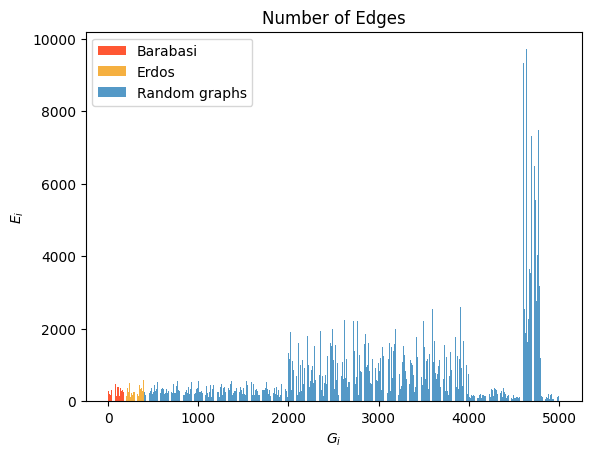

In [ ]:
#@title Number of Edges Plot
plt.bar(graphs[:200], NumEdges[:200], color='#FF5733', label='Barabasi')
plt.bar(graphs[200:400], NumEdges[200:400], color='#F5B041', label='Erdos')
plt.bar(graphs[400:], NumEdges[400:], color='#5499C7', label='Random graphs')
plt.xlabel(r'$G_{i}$')
plt.ylabel(r'$E_{i}$')
plt.title('Number of Edges')
plt.legend()
plt.savefig('Mydataset_Number of Edges.png')
plt.show()

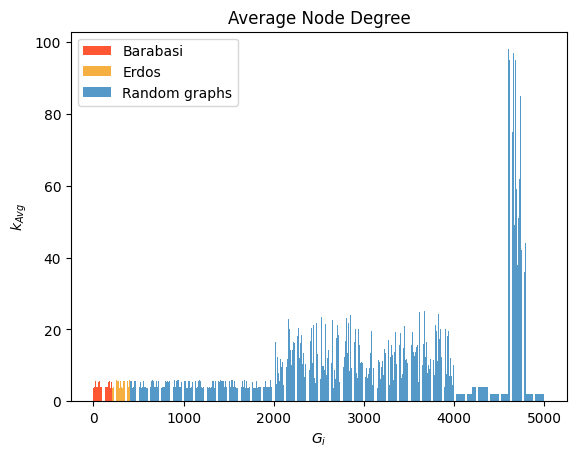

In [ ]:
#@title Average_Node_degree Plot
plt.bar(graphs[:200], avgnodedegree[:200], color='#FF5733', label='Barabasi')
plt.bar(graphs[200:400], avgnodedegree[200:400], color='#F5B041', label='Erdos')
plt.bar(graphs[400:], avgnodedegree[400:], color='#5499C7', label='Random graphs')
plt.xlabel(r'$G_{i}$')
plt.ylabel(r'$k_{Avg}$')
plt.title('Average Node Degree')
plt.legend()
plt.savefig('Mydataset_AverageNodeDegree.png')
plt.show()

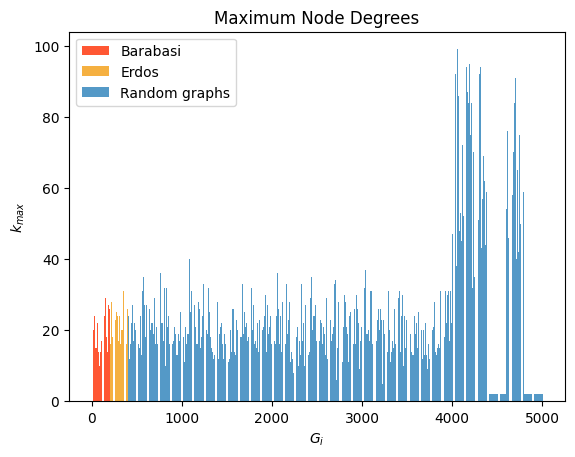

In [ ]:
#@title Max_degree Plot
plt.bar(graphs[:200], Max[:200], color='#FF5733', label='Barabasi')
plt.bar(graphs[200:400], Max[200:400], color='#F5B041', label='Erdos')
plt.bar(graphs[400:], Max[400:], color='#5499C7', label='Random graphs')
plt.xlabel(r'$G_{i}$')
plt.ylabel(r'$k_{max}$')
plt.title('Maximum Node Degrees')
plt.legend()
plt.savefig('Mydataset_MaximumNodeDegrees.png')
plt.show()

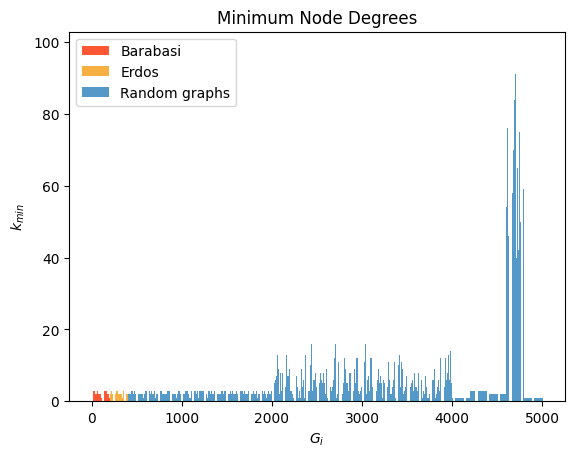

In [ ]:
#@title Min_degree Plot
plt.bar(graphs[:200], Min[:200], color='#FF5733', label='Barabasi')
plt.bar(graphs[200:400], Min[200:400], color='#F5B041', label='Erdos')
plt.bar(graphs[400:], Min[400:], color='#5499C7', label='Random graphs')
plt.xlabel(r'$G_{i}$')
plt.ylabel(r'$k_{min}$')
plt.title('Minimum Node Degrees')
plt.legend()
plt.savefig('Mydataset_MinimumNodeDegrees.png')
plt.show()

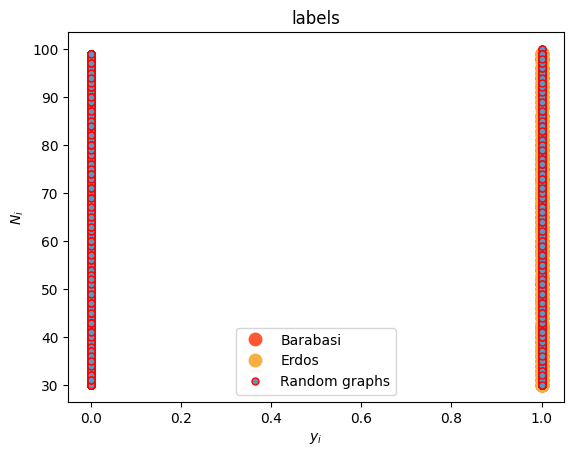

In [ ]:
#@title Labels Plot
plt.plot(labels[:200], NumNodes[:200], 'o', label='Barabasi', markersize=10, markerfacecolor='#FF5733', markeredgecolor='none')
plt.plot(labels[200:400], NumNodes[200:400], 'o', label='Erdos', markersize=10, markerfacecolor='#F5B041', markeredgecolor='none')
plt.plot(labels[400:], NumNodes[400:], 'ro', label='Random graphs', markersize=5, markerfacecolor='#5499C7')
plt.xlabel(r'$y_{i}$')
plt.ylabel(r'$N_{i}$')
plt.title('labels')
plt.legend()
plt.savefig('Mydataset_labels.png')
plt.show()

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#@title Dataset Folder

directory = "My_Dataset"
if not os.path.exists(directory):
    os.makedirs(directory)
    print(f"Directory '{directory}' has been created.")

Directory 'My_Dataset' has been created.


In [ ]:
#@title Creating graphs txt
base_file_name = "_graph"
label_file_name = "_label"

for i, data in enumerate(adj):
    file_graph = os.path.join(directory, f"{i + 1}{base_file_name}.txt")
    file_label = os.path.join(directory, f"{i + 1}{label_file_name}.txt")
    np.savetxt(file_graph, [NumNodes[i]], fmt='%d')
    np.savetxt(file_label, [labels[i]], fmt='%d')
    with open(file_graph, 'ab') as f:
        np.savetxt(f, adj[i], fmt= '%d')

# splitting dataset into trainset and testset

In [ ]:
torch.manual_seed(12275)
random.shuffle(Train_dataset)

train_dataset = Train_dataset
#vaild_dataset = Train_dataset[4000:]

print(f'Number of training graphs: {len(train_dataset)}')
#print(f'Number of validation graphs: {len(vaild_dataset)}')

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
#vaild_loader = DataLoader(vaild_dataset, batch_size=32, shuffle=False)

Number of training graphs: 5000


In [ ]:
torch.manual_seed(12875)
random.shuffle(Test_dataset)

test_dataset = Test_dataset

print(f'Number of testing graphs: {len(test_dataset)}')

test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

Number of testing graphs: 1200


In [ ]:
class GCN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(num_features, hidden_channels)
        self.conv2 = GCNConv(hidden_channels, hidden_channels)
        self.conv3 = GCNConv(hidden_channels, hidden_channels)
        self.lin = Linear(hidden_channels, num_classes)

    def forward(self, x, edge_index, batch):
        # 1. Obtain node embeddings
        x = self.conv1(x, edge_index)
        x = x.relu()
        x = self.conv2(x, edge_index)
        x = x.relu()
        x = self.conv3(x, edge_index)

        # 2. Readout layer
        x = global_mean_pool(x, batch)  # [batch_size, hidden_channels]

        # 3. Apply a final classifier
        x = F.dropout(x, p = 0.5, training = self.training)
        x = self.lin(x)

        return x

model = GCN(hidden_channels = 64)
print(model)

GCN(
  (conv1): GCNConv(3, 64)
  (conv2): GCNConv(64, 64)
  (conv3): GCNConv(64, 64)
  (lin): Linear(in_features=64, out_features=2, bias=True)
)


In [ ]:
from IPython.display import Javascript
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

model = GCN(hidden_channels=64)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

def train():
  model.train()
  x = 0
  for data in train_loader:  # Iterate in batches over the training dataset.
    out = model(data.x, data.edge_index, data.batch)  # Perform a single forward pass.
    loss = criterion(out, data.y)  # Compute the loss.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    optimizer.zero_grad()  # Clear gradients.
    x += torch.mean(loss)
  trainloss = x
  return trainloss

<IPython.core.display.Javascript object>

In [ ]:
def test(loader):
  model.eval()
  predected = []
  original = []
  correct = 0
  for data in loader:  # Iterate in batches over the training/test dataset.
      out = model(data.x, data.edge_index, data.batch)
      pred = out.argmax(dim=1)  # Use the class with highest probability.
      correct += int((pred == data.y).sum())  # Check against ground-truth labels.
      predected.append(pred)
      original.append(data.y)
  return predected, original, correct / len(loader.dataset)  # Derive ratio of correct predictions.

In [ ]:
train_losses = []
train_accuracy = []
vaild_accuracy = []

epoch = 15
for i in range(1, epoch+1):
    trainloss = train()
    train_pred, train_org, train_acc = test(train_loader)
    #vaild_pred, vaild_org, vaild_acc = test(vaild_loader)

    train_losses.append(trainloss.detach().numpy().tolist())
    train_accuracy.append(train_acc)
    #vaild_accuracy.append(vaild_acc)

    print(f'Epoch: {i:03d}, Train Acc: {train_acc:.4f}, Trainloss: {trainloss:.4f}')
    #print(f' Vaild Acc: {vaild_acc:.4f}')

Epoch: 001, Train Acc: 0.9190, Trainloss: 73.3315
Epoch: 002, Train Acc: 0.9310, Trainloss: 31.8523
Epoch: 003, Train Acc: 0.9468, Trainloss: 22.0177
Epoch: 004, Train Acc: 0.9484, Trainloss: 22.2376
Epoch: 005, Train Acc: 0.9328, Trainloss: 20.7398
Epoch: 006, Train Acc: 0.9350, Trainloss: 21.2000
Epoch: 007, Train Acc: 0.9474, Trainloss: 18.7782
Epoch: 008, Train Acc: 0.9476, Trainloss: 19.3144
Epoch: 009, Train Acc: 0.9496, Trainloss: 21.2906
Epoch: 010, Train Acc: 0.9498, Trainloss: 18.0028
Epoch: 011, Train Acc: 0.9502, Trainloss: 19.8060
Epoch: 012, Train Acc: 0.9514, Trainloss: 19.4601
Epoch: 013, Train Acc: 0.9406, Trainloss: 18.4845
Epoch: 014, Train Acc: 0.9538, Trainloss: 17.7664
Epoch: 015, Train Acc: 0.9538, Trainloss: 18.9138


In [ ]:
Test_accuracy = []

In [ ]:
test_pred, test_org, test_acc = test(test_loader)
test_acc =  test_acc* 100
Test_accuracy.append(test_acc)

print(f'Test Acc: {test_acc:.4f}%')

Test Acc: 93.2500%


In [ ]:
print(Test_accuracy)

[93.25]


In [ ]:
countequal  = 0
countnotequal = 0
pred = []
org = []

for i in range(len(test_pred)):
  for j in range(len(test_pred[i])):
    x = test_pred[i].tolist()
    y = test_org[i].tolist()
    pred.append(x[j])
    org.append(y[j])
    if x[j] == y[j]:
      countequal += 1
    else:
      countnotequal += 1


print(countequal)
print(countnotequal)

1119
81


In [ ]:
print(org)
print(pred)

[0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 

In [ ]:
# Example that i gave to check if the confusion matrix is working properly or not.
org = [1,1,1,1,1,1,0,1]
pred =[1,1,1,1,1,1,1,1]

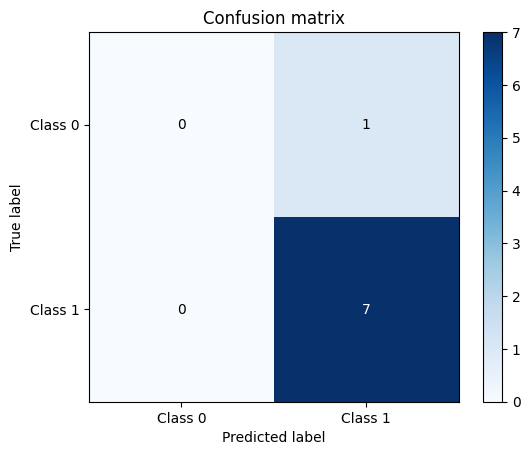

In [ ]:
#@title confusion matrix Plot

y_true = np.array(org)
y_pred = np.array(pred)

cm = confusion_matrix(y_true, y_pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[1]),
       xticklabels=['Class 0', 'Class 1'],
       yticklabels=['Class 0', 'Class 1'],
       title='Confusion matrix',
       ylabel='True label',
       xlabel='Predicted label')


threshold = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], 'd'),
                ha="center", va="center",
                color="white" if cm[i, j] > threshold else "black")

#plt.savefig('My_Dataset_confusion_matrix.png')
plt.show()

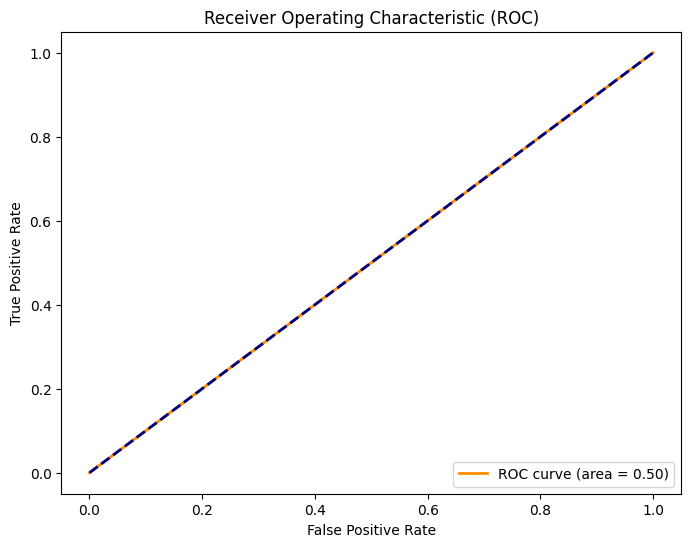

In [ ]:
#@title ROC Plot
fpr, tpr, _ = roc_curve(org, pred)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('My_Dataset10000_ROC.png')
plt.show()

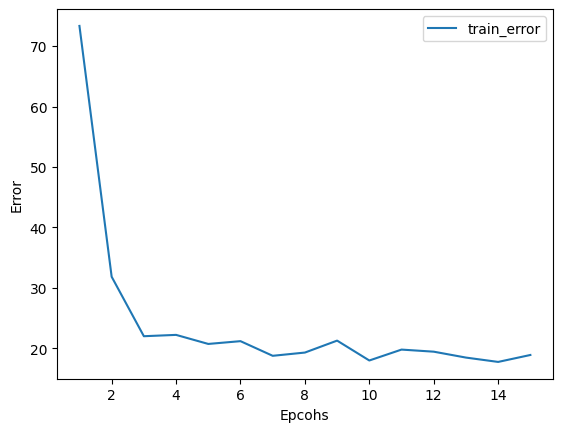

In [ ]:
#@title EpochVSError Plot
x_axis = [i for i in range(1,epoch+1)]
plt.plot(x_axis , train_losses, label='train_error')
plt.legend()
plt.xlabel("Epcohs")
plt.ylabel("Error")
plt.savefig('My_Dataset_errorVSepoch.png')
plt.show()

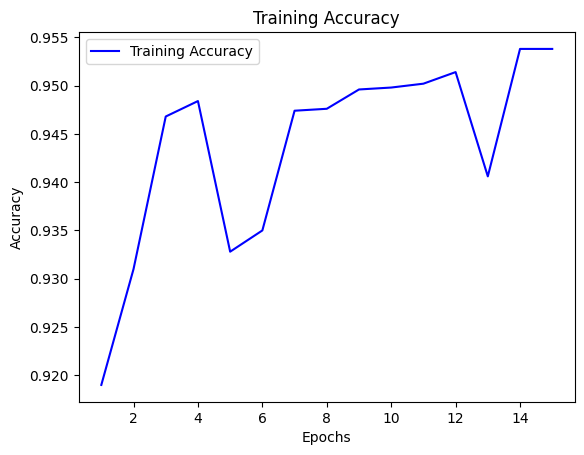

In [ ]:
#@title Accuracy Plot
fig, ax = plt.subplots()
ax.plot(x_axis, train_accuracy, 'b', label='Training Accuracy')
ax.set_xlabel('Epochs')
ax.set_ylabel('Accuracy')
ax.set_title('Training Accuracy')
ax.legend()
plt.savefig('myDataset_TrainAccuracy.png')
plt.show()

In [ ]:
sizeof_dataset = ['500', '1000', '1500', '2000', '2500', '3000', '3500', '4000', '4500', '5000', '5500', '6000', '6500', '7000', '7500', '8000', '8500', '9000', '9500', '10000']
print(len(sizeof_dataset))
print(len(Test_accuracy))

20
1


In [ ]:
#@title SizeVSaccuracy Plot
x_axis = sizeof_dataset
y_axis = Test_accuracy[:20]
plt.plot(x_axis , y_axis, label='Accuracy')
plt.xticks(rotation=50)
plt.legend()
plt.xlabel("Size of dataset")
plt.ylabel("accuracy")
plt.savefig('My_Dataset_sizeVSaccuracy.png')
plt.show()